In [9]:
# Standard Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# For stationarity tests (Augmented Dickey-Fuller)
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Make plots appear inline if using a Jupyter notebook
%matplotlib inline

In [10]:
df_raw = pd.read_csv('collected_data.csv', parse_dates=True, index_col=0)

print("Head of raw DataFrame:")
print(df_raw.head(), "\n")

print("Basic info:")
df_raw.info()
print()

print("Summary statistics:")
print(df_raw.describe())

Head of raw DataFrame:
              SP500  GS10  FEDFUNDS  CPIAUCSL
DATE                                         
2015-03-31  2067.89  2.04      0.11       NaN
2015-04-30  2085.51  1.94      0.12       NaN
2015-05-31  2107.39  2.20      0.12       NaN
2015-06-30  2063.11  2.36      0.13       NaN
2015-07-31  2103.84  2.32      0.13       NaN 

Basic info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2015-03-31 to 2025-02-28
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SP500     120 non-null    float64
 1   GS10      120 non-null    float64
 2   FEDFUNDS  120 non-null    float64
 3   CPIAUCSL  108 non-null    float64
dtypes: float64(4)
memory usage: 4.7 KB

Summary statistics:
             SP500        GS10    FEDFUNDS    CPIAUCSL
count   120.000000  120.000000  120.000000  108.000000
mean   3431.351417    2.525083    1.852917    3.221418
std    1131.500608    1.081876    1.888482    2.180825
min

In [11]:
# 2A. Identify if any rows have missing values
missing_summary = df_raw.isna().sum()
print("Missing value count per column:\n", missing_summary, "\n")

# 2B. Optionally, remove rows with any missing values
# If the dataset is small, you might prefer forward-fill or interpolation instead of dropping.
df_cleaned = df_raw.dropna()

print("Data after dropping rows with missing values. Shape =", df_cleaned.shape)

Missing value count per column:
 SP500        0
GS10         0
FEDFUNDS     0
CPIAUCSL    12
dtype: int64 

Data after dropping rows with missing values. Shape = (108, 4)


### Create Stationary or Differenced Variables

In [12]:
df_cleaned['SP500_Returns'] = df_cleaned['SP500'].pct_change() * 100

/tmp/ipykernel_1636911/975170030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['SP500_Returns'] = df_cleaned['SP500'].pct_change() * 100


In [13]:
df_cleaned['GS10_Change'] = df_cleaned['GS10'].diff()

/tmp/ipykernel_1636911/1516414340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['GS10_Change'] = df_cleaned['GS10'].diff()


In [14]:
df_cleaned['FEDFUNDS_Level'] = df_cleaned['FEDFUNDS']

/tmp/ipykernel_1636911/91145871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['FEDFUNDS_Level'] = df_cleaned['FEDFUNDS']


In [15]:
df_cleaned['Inflation_YoY'] = df_cleaned['CPIAUCSL']

/tmp/ipykernel_1636911/2993879771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Inflation_YoY'] = df_cleaned['CPIAUCSL']


In [16]:
# Example: keep only the new/processed columns
df_processed = df_cleaned[['SP500_Returns', 'GS10_Change', 'FEDFUNDS_Level', 'Inflation_YoY']].dropna()
print("Processed data:")
print(df_processed.head())

Processed data:
            SP500_Returns  GS10_Change  FEDFUNDS_Level  Inflation_YoY
DATE                                                                 
2016-04-30       0.269937        -0.08            0.37       1.172626
2016-05-31       1.532949         0.00            0.37       1.078476
2016-06-30       0.090607        -0.17            0.38       1.079287
2016-07-31       3.560981        -0.14            0.39       0.868363
2016-08-31      -0.121918         0.06            0.40       1.055316


## EDA (Summary Statistics, Correlations)

### Summary Statistics

In [18]:
print("Summary stats for processed variables:")
print(df_processed.describe())

Summary stats for processed variables:
       SP500_Returns  GS10_Change  FEDFUNDS_Level  Inflation_YoY
count     107.000000   107.000000      107.000000     107.000000
mean        1.095276     0.023925        2.055140       3.243192
std         4.438877     0.208932        1.903022       2.179261
min       -12.511932    -0.630000        0.050000       0.198201
25%        -1.051671    -0.095000        0.375000       1.735807
50%         1.788434     0.010000        1.550000       2.510393
75%         3.569152     0.150000        3.940000       3.706859
max        12.684410     0.620000        5.330000       8.999298


### Correlation Matrix

Correlation matrix:
                 SP500_Returns  GS10_Change  FEDFUNDS_Level  Inflation_YoY
SP500_Returns        1.000000    -0.117025        0.028634      -0.170697
GS10_Change         -0.117025     1.000000       -0.046217       0.256133
FEDFUNDS_Level       0.028634    -0.046217        1.000000       0.089918
Inflation_YoY       -0.170697     0.256133        0.089918       1.000000


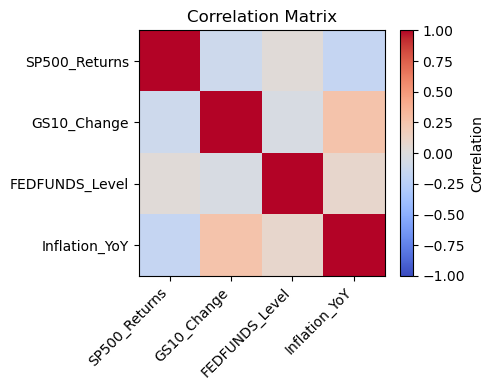

In [19]:
corr_matrix = df_processed.corr()
print("Correlation matrix:\n", corr_matrix)

# Plot the correlation matrix as a heatmap using matplotlib (no seaborn)
plt.figure(figsize=(5, 4))
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix)), corr_matrix.columns)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

### Stationarity Tests

In [20]:
def adf_test(series, title=''):
    """
    Perform ADF stationarity test and print results.
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['Test Statistic','p-value','# Lags Used','Number of Observations Used']
    out = pd.Series(result[0:4], index=labels)
    for key,val in result[4].items():
        out[f'Critical Value ({key})'] = val
    print(out.to_string())
    print('---')

adf_test(df_processed['SP500_Returns'], 'S&P 500 Returns')
adf_test(df_processed['GS10_Change'], '10-year Yield Change')
adf_test(df_processed['FEDFUNDS_Level'], 'Federal Funds Rate (level)')
adf_test(df_processed['Inflation_YoY'], 'Inflation YoY')

Augmented Dickey-Fuller Test: S&P 500 Returns
Test Statistic                -1.215904e+01
p-value                        1.508450e-22
# Lags Used                    0.000000e+00
Number of Observations Used    1.060000e+02
Critical Value (1%)           -3.493602e+00
Critical Value (5%)           -2.889217e+00
Critical Value (10%)          -2.581533e+00
---
Augmented Dickey-Fuller Test: 10-year Yield Change
Test Statistic                -6.753411e+00
p-value                        2.912227e-09
# Lags Used                    1.000000e+00
Number of Observations Used    1.050000e+02
Critical Value (1%)           -3.494220e+00
Critical Value (5%)           -2.889485e+00
Critical Value (10%)          -2.581676e+00
---
Augmented Dickey-Fuller Test: Federal Funds Rate (level)
Test Statistic                  -2.162295
p-value                          0.220214
# Lags Used                      5.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Val

### Visual Time-Series Inspection

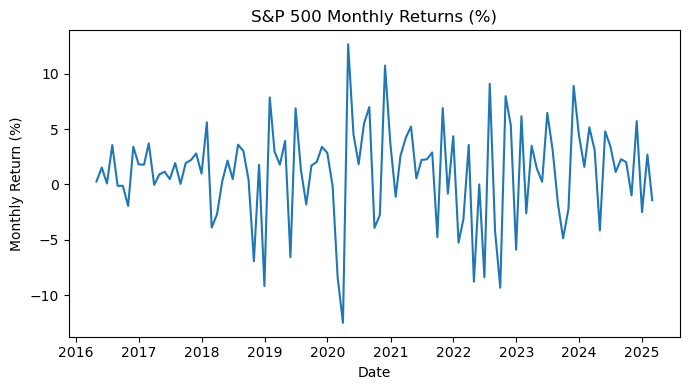

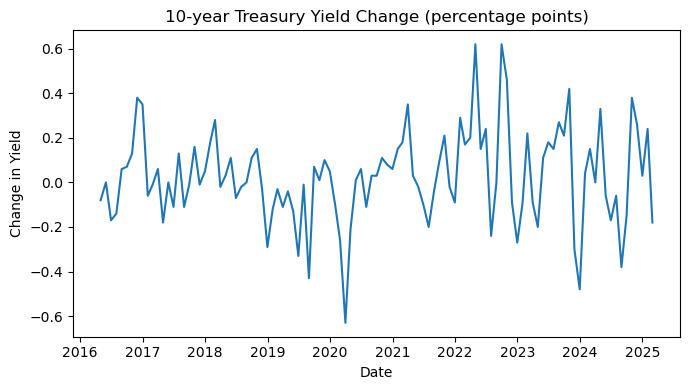

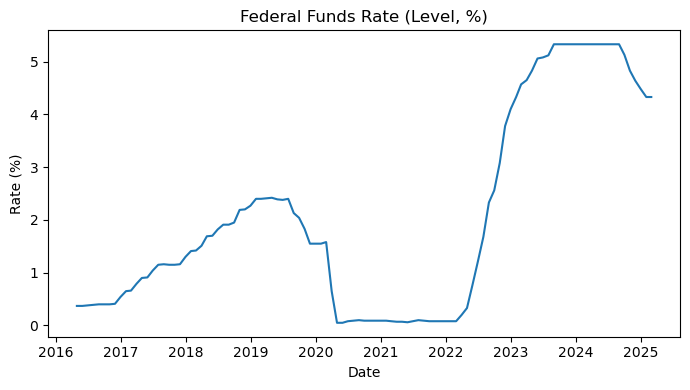

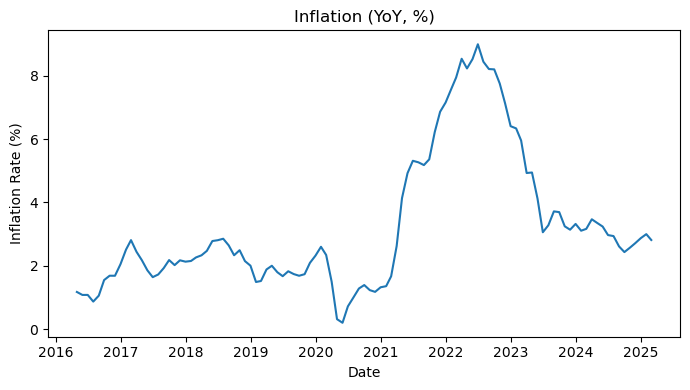

In [21]:
# 6A. Plot each variable over time
plt.figure(figsize=(7, 4))
plt.plot(df_processed.index, df_processed['SP500_Returns'])
plt.title("S&P 500 Monthly Returns (%)")
plt.xlabel("Date")
plt.ylabel("Monthly Return (%)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
plt.plot(df_processed.index, df_processed['GS10_Change'])
plt.title("10-year Treasury Yield Change (percentage points)")
plt.xlabel("Date")
plt.ylabel("Change in Yield")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
plt.plot(df_processed.index, df_processed['FEDFUNDS_Level'])
plt.title("Federal Funds Rate (Level, %)")
plt.xlabel("Date")
plt.ylabel("Rate (%)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 4))
plt.plot(df_processed.index, df_processed['Inflation_YoY'])
plt.title("Inflation (YoY, %)")
plt.xlabel("Date")
plt.ylabel("Inflation Rate (%)")
plt.tight_layout()
plt.show()

### Distribution Plots

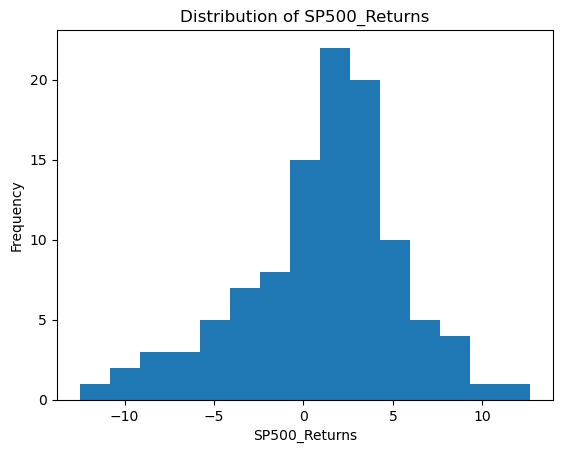

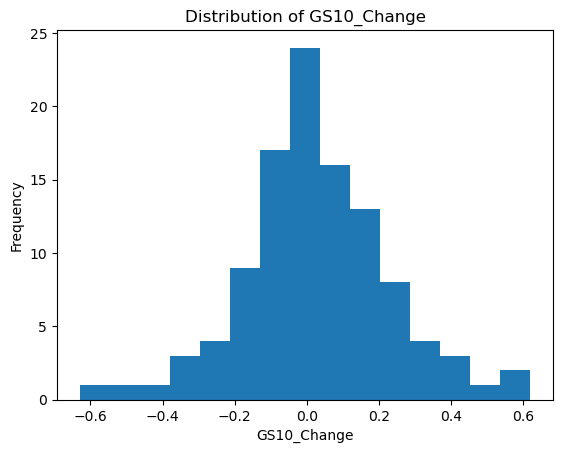

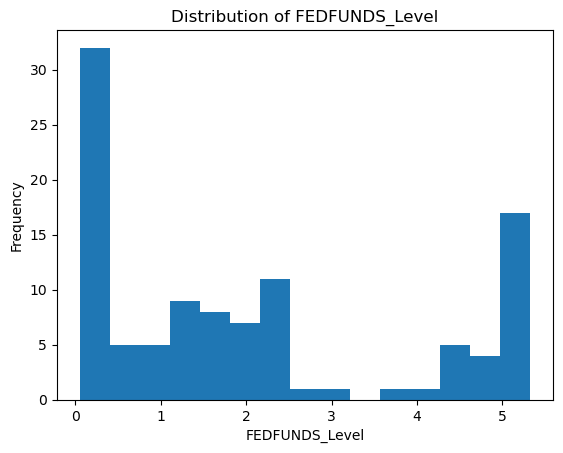

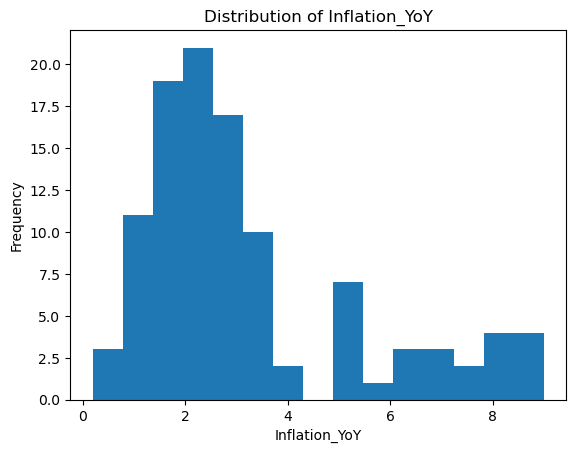

In [22]:
variables = ['SP500_Returns', 'GS10_Change', 'FEDFUNDS_Level', 'Inflation_YoY']
for var in variables:
    plt.figure()
    plt.hist(df_processed[var].dropna(), bins=15)
    plt.title(f"Distribution of {var}")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.show()